In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")

In [3]:
test = pd.read_csv("test.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


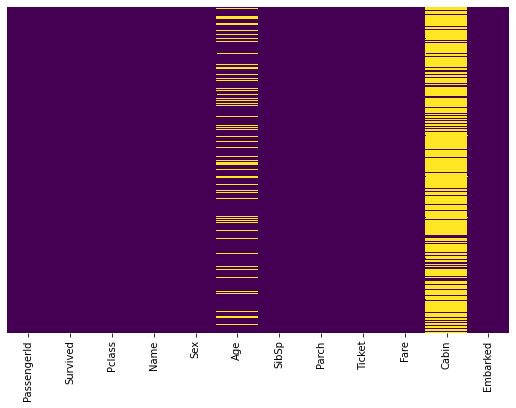

In [8]:
plt.figure(figsize=(9,6))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [9]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
sns.set_style('whitegrid')

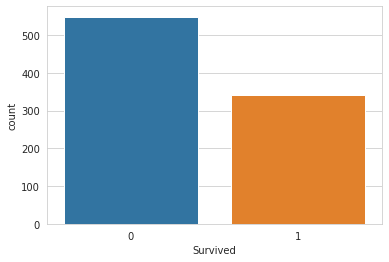

In [11]:
sns.countplot(x='Survived', data=train)

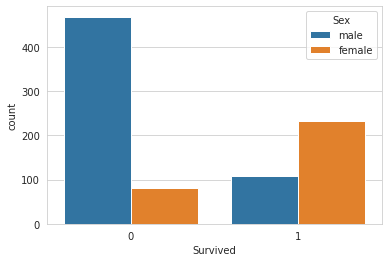

In [12]:
sns.countplot(x='Survived', hue='Sex', data=train)

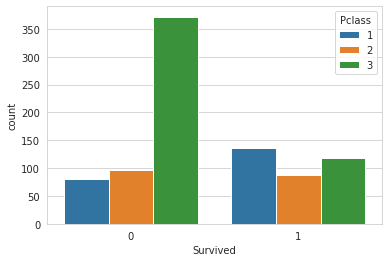

In [13]:
sns.countplot(x='Survived', hue='Pclass', data = train)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


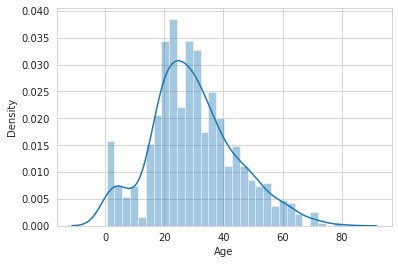

In [14]:
sns.distplot(train['Age'].dropna(), bins=30)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

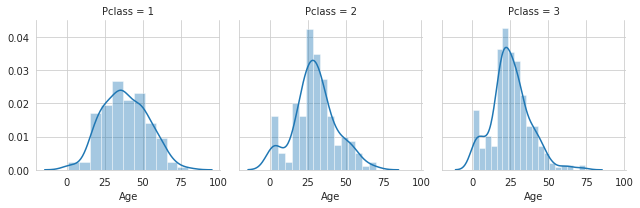

In [15]:
g = sns.FacetGrid(train, col = 'Pclass')
g.map(sns.distplot, 'Age')

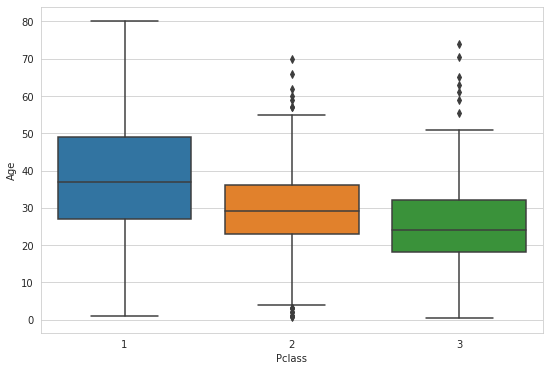

In [16]:
plt.figure(figsize=(9,6))
sns.boxplot(data=train, x='Pclass', y='Age')

In [17]:
train.drop('PassengerId', axis=1, inplace=True)

In [18]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 38
        elif Pclass==2:
            return 29
        else:
            return 24
    else: 
        return Age

In [19]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

In [20]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


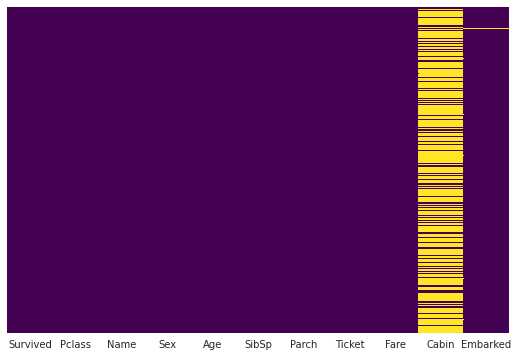

In [21]:
plt.figure(figsize=(9,6))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

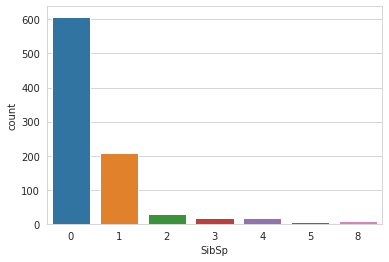

In [22]:
sns.countplot(data=train, x='SibSp')

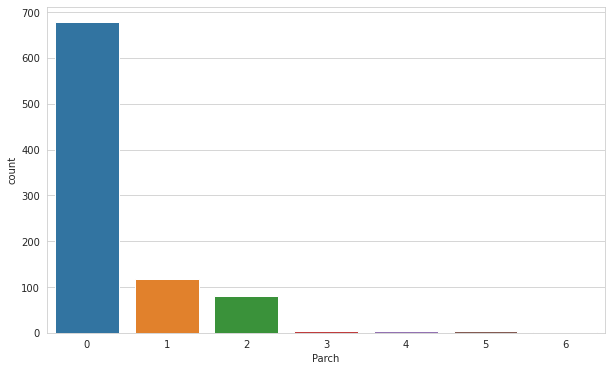

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(x='Parch', data=train)

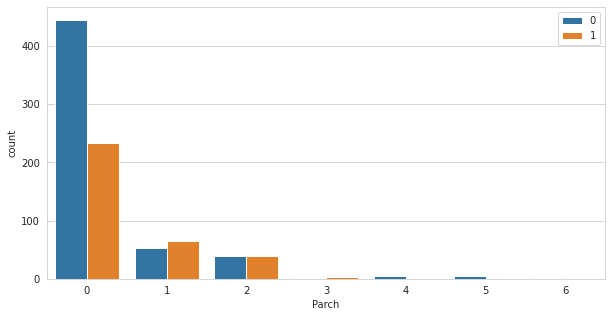

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(x='Parch', hue='Survived', data=train).legend(loc=1)

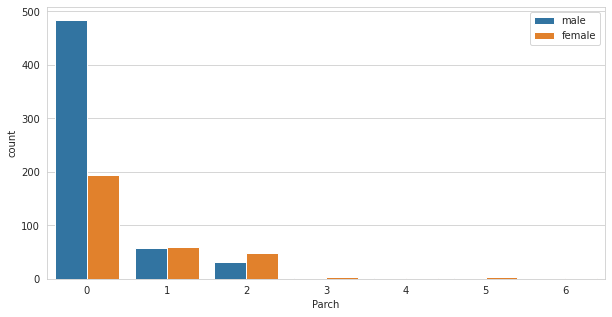

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(x='Parch', hue='Sex', data=train).legend(loc=1)

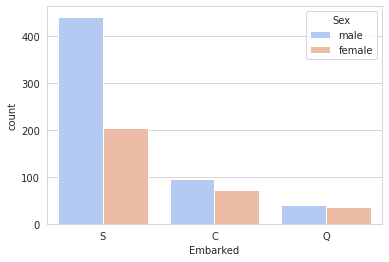

In [26]:
sns.countplot(x='Embarked', hue='Sex', data=train, palette='coolwarm')

In [27]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

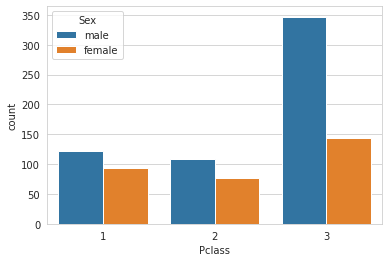

In [28]:
sns.countplot(x='Pclass', hue='Sex', data=train)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


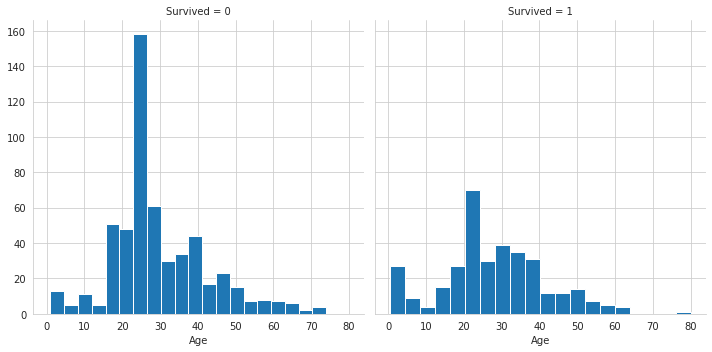

In [29]:
g = sns.FacetGrid(train, col='Survived', size=5)
g.map(plt.hist, 'Age', bins=20)

In [30]:
train['Title'] = train['Name'].apply(lambda x: x.split(",")[1].split(" ")[1])

In [31]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.


In [32]:
df1 = train[['Title', 'Survived']].groupby('Title').count().merge(train[['Title', 'Survived']].groupby('Title').mean(),
                                                                  right_index=True, left_index=True)
df1.columns = ['Count', 'Prob. Survived']
df1

,Count,Prob. Survived
Title,,
Capt.,1,0.000000
Col.,2,0.500000
Don.,1,0.000000
Dr.,7,0.428571
Jonkheer.,1,0.000000
Lady.,1,1.000000
Major.,2,0.500000
Master.,40,0.575000
Miss.,182,0.697802


In [33]:
train.drop('Name', axis=1, inplace=True)

In [34]:
train['Cabin'] = train['Cabin'].fillna('No')

In [35]:
np.array(train['Cabin'][train['Cabin']!='No'])

array(['C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73',
       'C23 C25 C27', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60',
       'E101', 'D26', 'F E69', 'D47', 'C123', 'B86', 'F2', 'C2', 'E33',
       'B19', 'A7', 'C49', 'F4', 'A32', 'F2', 'B4', 'B80', 'G6', 'A31',
       'D36', 'D15', 'C93', 'C83', 'C78', 'D35', 'G6', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'B58 B60', 'E101', 'C22 C26', 'C65', 'E36',
       'C54', 'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'D', 'B18', 'C124',
       'C91', 'C2', 'E40', 'T', 'F2', 'C23 C25 C27', 'F33', 'C128', 'E33',
       'D37', 'B35', 'E50', 'C82', 'B96 B98', 'D36', 'G6', 'C78', 'E10',
       'C52', 'E44', 'B96 B98', 'C23 C25 C27', 'A34', 'C104', 'C111',
       'C92', 'E38', 'D21', 'E12', 'E63', 'D', 'A14', 'B49', 'C93', 'B37',
       'C30', 'D20', 'C22 C26', 'B79', 'C65', 'E25', 'D46', 'F33', 'B73',


In [36]:
def cabin_no(cabin):
    if len(cabin) == 1:
        return 0
    else: 
        if cabin!='No':
            return int(cabin.split(" ")[-1][1:])
        else:
            return 0

In [37]:
#Extracting Cabin Deck and Number
train['Cabin Deck'] = train['Cabin'].apply(lambda x: x.split(" ")[-1][0] if x!= 'No' else 'No')
train['Cabin_number'] = train['Cabin'].apply(cabin_no)

In [38]:
df2 = train[['Cabin Deck', 'Survived']].groupby('Cabin Deck').count().merge(train[['Cabin Deck', 'Survived']].groupby('Cabin Deck').mean(),
                                                                  right_index=True, left_index=True)
df2.columns = ['Count', 'Prob. Survived']
df2

,Count,Prob. Survived
Cabin Deck,,
A,15,0.466667
B,47,0.744681
C,59,0.593220
D,33,0.757576
E,33,0.757576
F,9,0.777778
G,7,0.285714
No,687,0.299854
T,1,0.000000


In [39]:
#There are numerous cabin numbers. Hence it wont be very imformative, so we will group the cabins by their range
train['Cabin_no_range'] = train['Cabin_number'].apply(lambda x: str(int(x/10)) + "0 to " + str(int(x/10)+1) + "0" if x!=0
                                                     else 'No Cabin')
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Cabin Deck,Cabin_number,Cabin_no_range
0,0,3,male,22.0,1,0,A/5 21171,7.2500,No,S,Mr.,No,0,No Cabin
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,C,85,80 to 90
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,No,S,Miss.,No,0,No Cabin
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs.,C,123,120 to 130
4,0,3,male,35.0,0,0,373450,8.0500,No,S,Mr.,No,0,No Cabin


In [40]:
df3 = train[['Cabin_no_range', 'Survived']].groupby('Cabin_no_range').count().merge(train[['Cabin_no_range', 'Survived']].groupby('Cabin_no_range').mean(),
                                                                  right_index=True, left_index=True)
df3.columns = ['Count', 'Prob. Survived']
df3

,Count,Prob. Survived
Cabin_no_range,,
00 to 10,24,0.708333
10 to 20,16,0.750000
100 to 110,9,0.888889
110 to 120,3,0.000000
120 to 130,11,0.636364
140 to 150,1,1.000000
20 to 30,27,0.703704
30 to 40,30,0.666667
40 to 50,18,0.666667


In [41]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)
pclass = pd.get_dummies(train['Pclass'], drop_first=True)

In [42]:
train = pd.concat([train, sex, embark, pclass], axis=1)


In [43]:
train.drop(['Pclass', 'Sex', 'Embarked', 'Ticket','Cabin', 'Cabin_number'], axis=1, inplace=True)
train.head()

,Survived,Age,SibSp,Parch,Fare,Title,Cabin Deck,Cabin_no_range,male,Q,S,2,3
0,0,22.0,1,0,7.2500,Mr.,No,No Cabin,1,0,1,0,1
1,1,38.0,1,0,71.2833,Mrs.,C,80 to 90,0,0,0,0,0
2,1,26.0,0,0,7.9250,Miss.,No,No Cabin,0,0,1,0,1
3,1,35.0,1,0,53.1000,Mrs.,C,120 to 130,0,0,1,0,0
4,0,35.0,0,0,8.0500,Mr.,No,No Cabin,1,0,1,0,1


In [44]:
train['Family_size'] = train['SibSp'] + train['Parch'] + 1 

In [45]:
train.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [46]:
train.head()

,Survived,Age,Fare,Title,Cabin Deck,Cabin_no_range,male,Q,S,2,3,Family_size
0,0,22.0,7.2500,Mr.,No,No Cabin,1,0,1,0,1,2
1,1,38.0,71.2833,Mrs.,C,80 to 90,0,0,0,0,0,2
2,1,26.0,7.9250,Miss.,No,No Cabin,0,0,1,0,1,1
3,1,35.0,53.1000,Mrs.,C,120 to 130,0,0,1,0,0,2
4,0,35.0,8.0500,Mr.,No,No Cabin,1,0,1,0,1,1


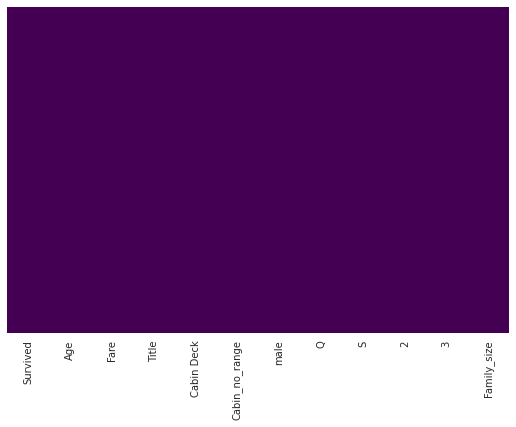

In [47]:
plt.figure(figsize=(9,6))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [48]:
title = pd.get_dummies(train['Title'])
cabin_deck = pd.get_dummies(train['Cabin Deck'])
cabin_no_range = pd.get_dummies(train['Cabin_no_range'])

In [49]:
train = pd.concat([title, cabin_deck, cabin_no_range, train], axis=1)

In [50]:
train.drop(['Cabin Deck', 'Cabin_no_range', 'Title'], axis=1, inplace=True)

In [51]:
train.head()

,Capt.,Col.,Don.,Dr.,Jonkheer.,Lady.,Major.,Master.,Miss.,Mlle.,Mme.,Mr.,Mrs.,Ms.,Rev.,Sir.,the,A,B,C,D,E,F,G,No,T,00 to 10,10 to 20,100 to 110,110 to 120,120 to 130,140 to 150,20 to 30,30 to 40,40 to 50,50 to 60,60 to 70,70 to 80,80 to 90,90 to 100,No Cabin,Survived,Age,Fare,male,Q,S,2,3,Family_size
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,22.0,7.2500,1,0,1,0,1,2
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,38.0,71.2833,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,26.0,7.9250,0,0,1,0,1,1
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,35.0,53.1000,0,0,1,0,0,2
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,35.0,8.0500,1,0,1,0,1,1


In [52]:
#Implementing decision trees and random forests
from sklearn.model_selection import train_test_split

In [53]:
X=train.drop('Survived', axis=1)
y=train['Survived']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
dtree = DecisionTreeClassifier()

In [57]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [58]:
predictions = dtree.predict(X_test)

In [59]:
from sklearn.metrics import classification_report, confusion_matrix

In [60]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       158
           1       0.73      0.75      0.74       110

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



In [61]:
print(confusion_matrix(y_test, predictions))

[[128  30]
 [ 27  83]]


In [62]:
#Implementing Random Forests
from sklearn.ensemble import RandomForestClassifier

In [63]:
rfc = RandomForestClassifier()

In [64]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [65]:
rfc_pred = rfc.predict(X_test)

In [66]:
print(confusion_matrix(y_test, rfc_pred))

[[143  15]
 [ 32  78]]


In [67]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       158
           1       0.84      0.71      0.77       110

    accuracy                           0.82       268
   macro avg       0.83      0.81      0.81       268
weighted avg       0.83      0.82      0.82       268

